In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


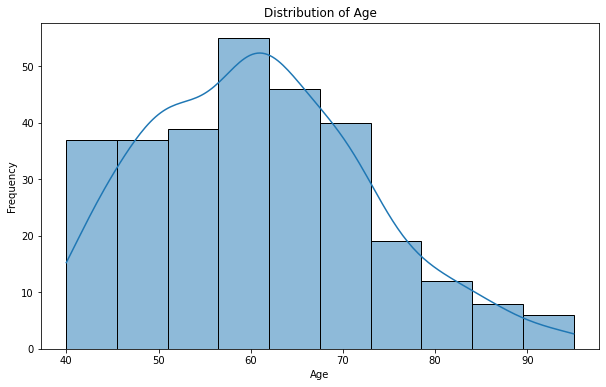

In [6]:
# 1.What is the distribution of age among heart failure patients in the dataset?
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

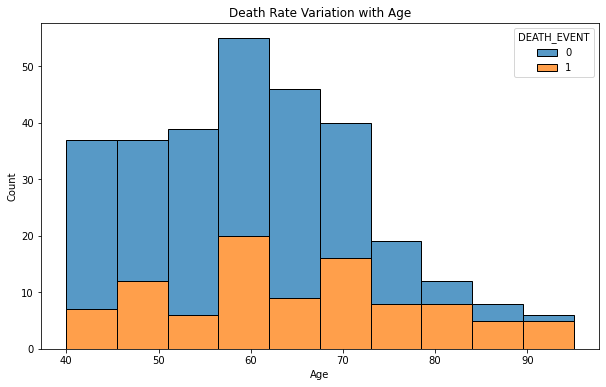

In [7]:
# 2. How does the death rate vary with age?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack')
plt.title('Death Rate Variation with Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

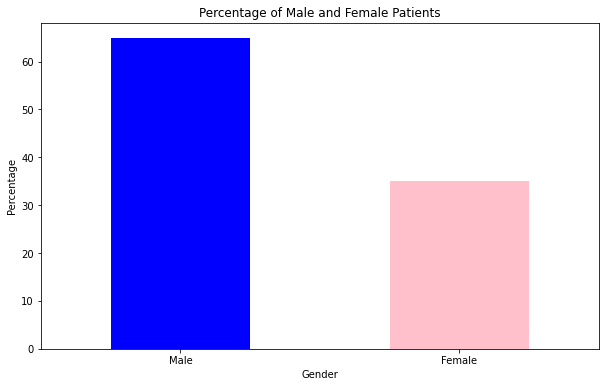

In [8]:
# 3.What is the percentage of male and female patients in the dataset?
gender_counts = df['sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

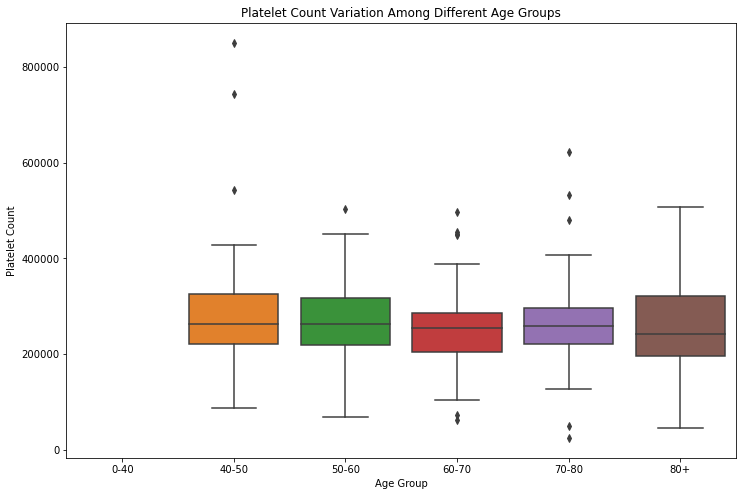

In [9]:
# 4.How does the platelet count vary among different age groups
bins = [0, 40, 50, 60, 70, 80, 100]
labels = ['0-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Platelet count variation among different age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='platelets', data=df)
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

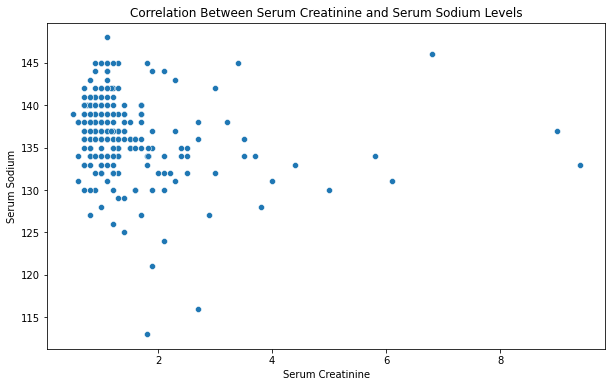

                  serum_creatinine  serum_sodium
serum_creatinine          1.000000     -0.189095
serum_sodium             -0.189095      1.000000


In [10]:
# Is there a correlation between creatinine and sodium levels in the blood?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df)
plt.title('Correlation Between Serum Creatinine and Serum Sodium Levels')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()

# Calculate correlation coefficient
correlation = df[['serum_creatinine', 'serum_sodium']].corr()
print(correlation)

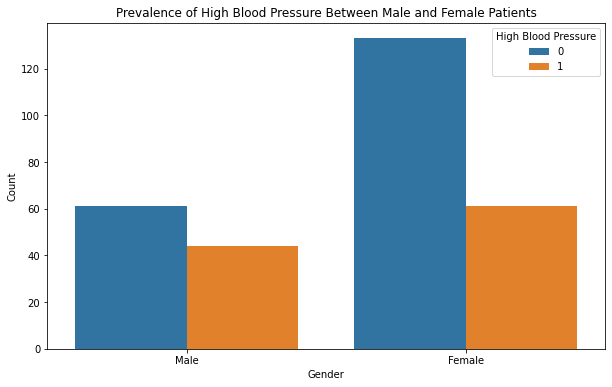

In [11]:
# How does the prevalence of high blood pressure differ between male and female patients?
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='high_blood_pressure', data=df)
plt.title('Prevalence of High Blood Pressure Between Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='High Blood Pressure', loc='upper right')
plt.show()

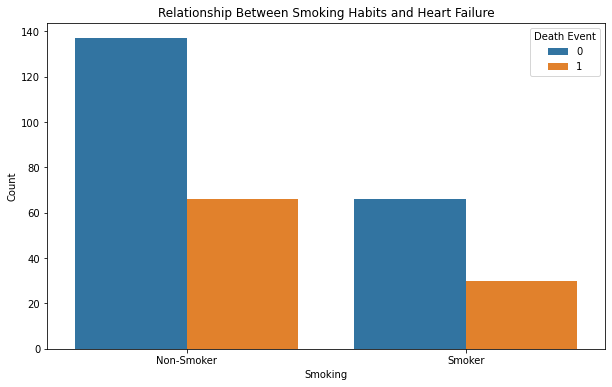

In [12]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Relationship Between Smoking Habits and Heart Failure')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(title='Death Event', loc='upper right')
plt.show()

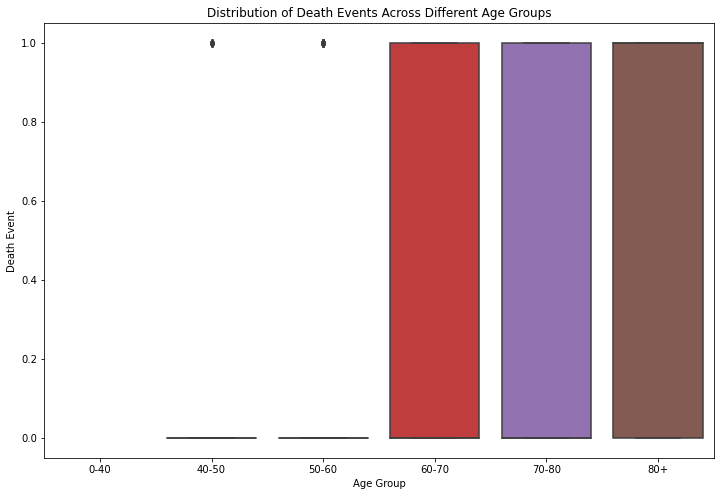

In [13]:
# 8. Are there any noticeable patterns in the distribution of death events across different age groups?
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='DEATH_EVENT', data=df)
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Death Event')
plt.show()

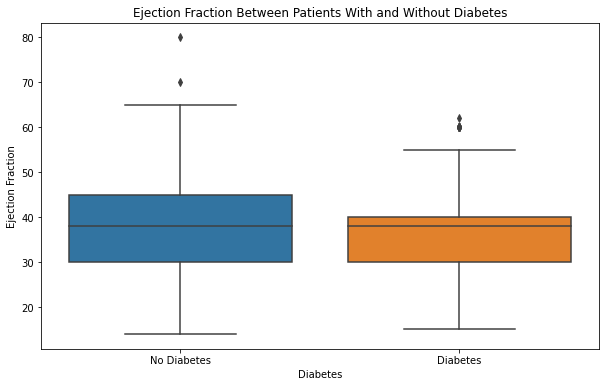

In [14]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Ejection Fraction Between Patients With and Without Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Ejection Fraction')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

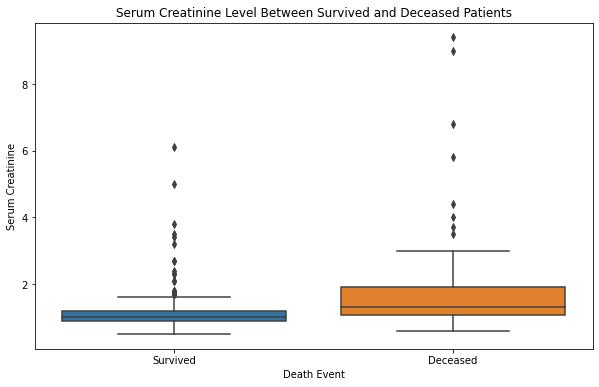

In [15]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Level Between Survived and Deceased Patients')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Deceased'], rotation=0)
plt.show()